<a href="https://colab.research.google.com/github/ARJUNCO333/project/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,156646.32,491301.04,0.0,0.0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.size

464981

In [ ]:
df.shape

(42271, 11)

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
a=df['nameDest'].mode() [0]
df['nameDest'].fillna(a,inplace=True)
b=df['oldbalanceDest'].mean()
df['oldbalanceDest'].fillna(b,inplace=True)
c=df['oldbalanceOrg'].mean()
df['oldbalanceOrg'].fillna(c,inplace=True)
d=df['newbalanceOrig'].mean()
df['newbalanceOrig'].fillna(d,inplace=True)
x=df['isFlaggedFraud'].mode() [0]
df['isFlaggedFraud'].fillna(x,inplace=True)
y=df['newbalanceDest'].mean()
df['newbalanceDest'].fillna(y,inplace=True)
z=df['isFraud'].mode() [0]
df['isFraud'].fillna(z,inplace=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000000e+00,0.000000e+00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000000e+00,0.000000e+00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000000e+00,0.000000e+00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,2.118200e+04,0.000000e+00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,5.069576e+05,1.343782e+06,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5.075471e+06,5.621547e+06,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2.533160e+06,2.644164e+06,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,1.566463e+05,4.913010e+05,0.0,0.0


In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df["type"] = df["type"].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})
df["isFraud"] = df["isFraud"].map({0:"No Fraud",1:"Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud             0.0  
1  M2044282225             0.0             0.0  No Fraud             0.0  
2   C553264065             0.0             0.0     Fraud             0.0  
3    C38997010         21182.0             0.0     Fraud             0.0  
4  M1230701703             0.0             0.0  No Fraud             0.0  


In [ ]:
df['newbalanceDest'].unique()

array([      0.        ,   40348.79      ,  157982.12      , ...,
        202125.69      , 5621546.93      , 1158404.51147386])

In [ ]:
a=df['type'].value_counts()
a

2    19382
1    10689
3     7632
4     3974
5      594
Name: type, dtype: int64

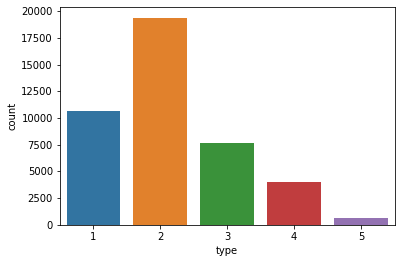

In [ ]:
import seaborn as sns
sns.countplot(x='type',data=df)

In [ ]:
X=df['amount'].mean()
X

149010.79214000143

In [ ]:
Y=df['amount'].sum()
Y

6298835194.55

In [ ]:
A=df['isFraud'].mode() [0]
A

'No Fraud'

In [ ]:
df1=df.groupby('type') ['amount'].sum()
print(df1)

type
1    1.950162e+09
2    1.803267e+08
3    1.279518e+09
4    2.886641e+09
5    2.187399e+06
Name: amount, dtype: float64


In [ ]:
x = np.array(df[["type","amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])
x

array([[2.0000000e+00, 9.8396400e+03, 1.7013600e+05, 1.6029636e+05],
       [2.0000000e+00, 1.8642800e+03, 2.1249000e+04, 1.9384720e+04],
       [4.0000000e+00, 1.8100000e+02, 1.8100000e+02, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.1100387e+05, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0102544e+05, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.7144128e+05, 0.0000000e+00, 0.0000000e+00]])

In [ ]:
df.rename(columns={"step":"time"},inplace=True)
df

,time,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000000e+00,0.000000e+00,No Fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000000e+00,0.000000e+00,No Fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.000000e+00,0.000000e+00,Fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,2.118200e+04,0.000000e+00,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000000e+00,0.000000e+00,No Fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,1,195364.06,C1096102092,0.0,0.00,C2021579766,5.069576e+05,1.343782e+06,No Fraud,0.0
42267,9,1,546075.62,C1791035294,0.0,0.00,C1039162432,5.075471e+06,5.621547e+06,No Fraud,0.0
42268,9,1,111003.87,C1145755913,0.0,0.00,C743528393,2.533160e+06,2.644164e+06,No Fraud,0.0
42269,9,1,101025.44,C292739335,0.0,0.00,C299715257,1.566463e+05,4.913010e+05,No Fraud,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train

array([[2.0000000e+00, 1.5080000e+02, 0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 6.4650300e+03, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 8.8774310e+04, 0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 2.7455841e+05, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 9.6178800e+04, 0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 7.6942600e+03, 2.8561800e+05, 2.7792374e+05]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
print(x_train)
print(x_test)

[[-0.16326481 -0.47025769 -0.33589049 -0.33639689]
 [-0.16326481 -0.45041067 -0.33589049 -0.33639689]
 [-1.20909979 -0.19169439 -0.33589049 -0.33639689]
 ...
 [-1.20909979  0.39226614 -0.33589049 -0.33639689]
 [-1.20909979 -0.16842044 -0.33589049 -0.33639689]
 [-0.16326481 -0.44654693 -0.2106969  -0.21653574]]
[[-0.16326481 -0.46481939 -0.24469177 -0.24747658]
 [ 0.88257017  0.31207685  0.46316094  0.55720664]
 [-0.16326481 -0.43497349 -0.29039762 -0.2965422 ]
 ...
 [-0.16326481 -0.46499959 -0.33589049 -0.33639689]
 [ 0.88257017  0.02938904  0.02978276  0.09201374]
 [-0.16326481 -0.43700464 -0.24719947 -0.25376033]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

In [ ]:
features = np.array([[8, 8000.60, 7000.60, 0.9]])
print(model.predict(features))

['Fraud']


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
score

0.9981076286221171

In [ ]:
report

'              precision    recall  f1-score   support\n\n       Fraud       0.68      0.57      0.62        23\n    No Fraud       1.00      1.00      1.00      8432\n\n    accuracy                           1.00      8455\n   macro avg       0.84      0.78      0.81      8455\nweighted avg       1.00      1.00      1.00      8455\n'

In [ ]:
matrix

array([[  13,   10],
       [   6, 8426]])

In [ ]:
df.describe()

,time,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,42271.000000,42271.000000,4.227100e+04,4.227100e+04,4.227100e+04,4.227100e+04,4.227100e+04,42271.0
mean,7.171087,2.157862,1.490108e+05,7.727734e+05,7.874065e+05,8.450982e+05,1.158405e+06,0.0
std,2.118037,0.954483,3.145005e+05,2.284003e+06,2.321941e+06,2.466713e+06,2.960473e+06,0.0
min,1.000000,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,7.000000,1.000000,7.031875e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,8.000000,2.000000,2.751283e+04,1.856733e+04,3.339900e+02,0.000000e+00,0.000000e+00,0.0
75%,8.000000,3.000000,1.794321e+05,1.421965e+05,1.500335e+05,4.338678e+05,8.013660e+05,0.0
max,9.000000,5.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,0.0


In [ ]:
df.corr()

,time,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
time,1.000000,-0.121184,0.079207,-0.037869,-0.038267,-0.001980,0.014045,NaN
type,-0.121184,1.000000,0.324289,0.257302,0.263935,0.089388,0.109707,NaN
amount,0.079207,0.324289,1.000000,0.015872,0.004886,0.289997,0.404038,NaN
oldbalanceOrg,-0.037869,0.257302,0.015872,1.000000,0.998351,0.127876,0.094344,NaN
newbalanceOrig,-0.038267,0.263935,0.004886,0.998351,1.000000,0.130743,0.094209,NaN
oldbalanceDest,-0.001980,0.089388,0.289997,0.127876,0.130743,1.000000,0.929393,NaN
newbalanceDest,0.014045,0.109707,0.404038,0.094344,0.094209,0.929393,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


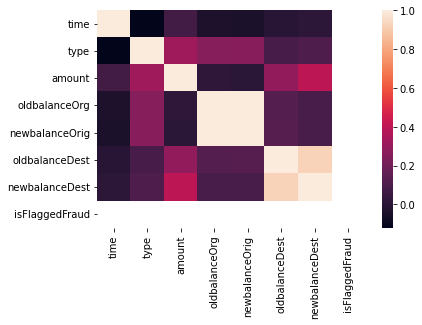

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

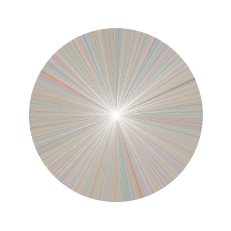

In [ ]:
import matplotlib.pyplot as plt
X=df['amount']
plt.pie(X)
plt.show()

(array([[5.992e+03, 1.578e+03, 7.600e+02, 1.250e+02, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [6.409e+03, 1.681e+03, 1.740e+02, 8.100e+01, 5.300e+01, 3.300e+01,
         9.000e+00, 8.000e+00, 3.000e+00, 4.000e+00],
        [7.215e+03, 6.090e+02, 3.380e+02, 2.010e+02, 5.500e+01, 1.100e+01,
         1.000e+01, 6.000e+00, 6.000e+00, 4.000e+00],
        [7.215e+03, 5.880e+02, 3.560e+02, 2.050e+02, 5.300e+01, 1.300e+01,
         1.000e+01, 6.000e+00, 5.000e+00, 4.000e+00]]),
 array([-1.20909979,  0.11596603,  1.44103186,  2.76609768,  4.0911635 ,
         5.41622933,  6.74129515,  8.06636097,  9.3914268 , 10.71649262,
        12.04155844]),
 <a list of 4 Lists of Patches objects>)

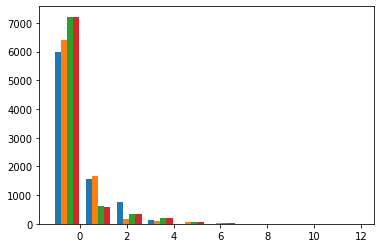

In [ ]:
plt.hist(x_test)

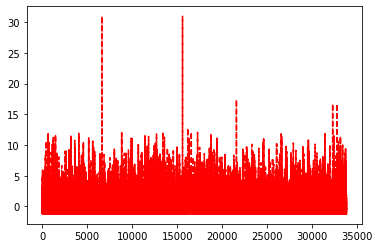

In [ ]:
plt.plot(x_train,linestyle='dashed',color='r')

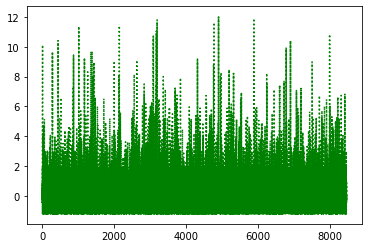

In [ ]:
plt.plot(x_test,linestyle='dotted',color='g')

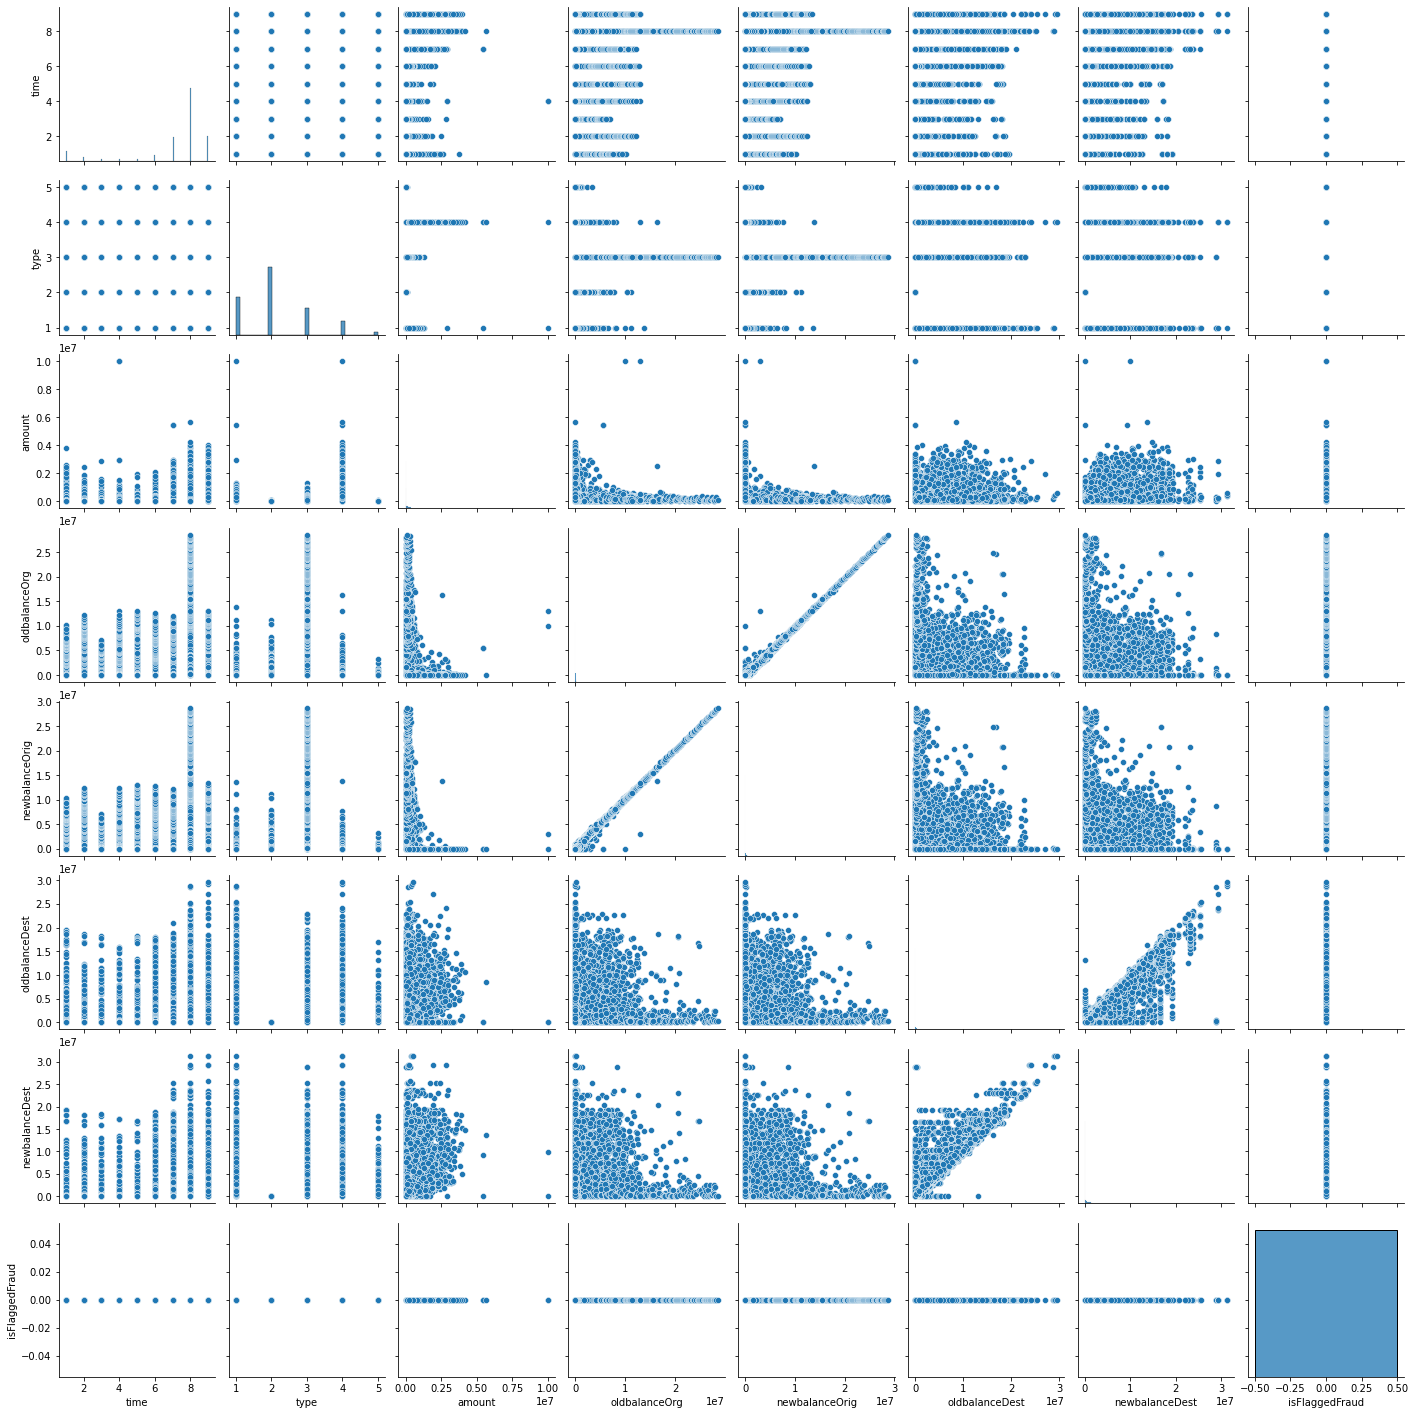

In [ ]:
sns.pairplot(df)

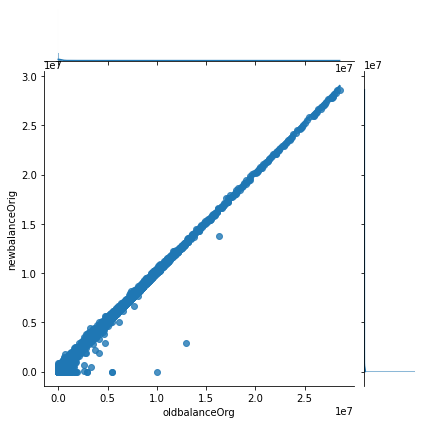

In [ ]:
sns.jointplot(x='oldbalanceOrg',y='newbalanceOrig',data=df,kind='reg')